# Data Preparation and Quality
Lecture Data Engineering and Analytics<br>
Eva Zangerle

In [58]:
# import required packages
import json
import os
from pprint import pprint
from sys import getsizeof
from IPython.core.interactiveshell import InteractiveShell

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import sklearn.datasets
import sklearn.preprocessing as preproc
from matplotlib import cm
from matplotlib.colors import ListedColormap
from scipy import stats
from sklearn import linear_model, preprocessing
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction import FeatureHasher, text
from sklearn.impute import SimpleImputer
from sklearn.metrics import pairwise_distances_argmin

In [59]:
data_dir = "../data"

In [60]:
%load_ext watermark
%watermark -a "Eva Zangerle" --updated --date --time --iversions --githash

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Eva Zangerle

Last updated: 2024-11-05 12:41:04

Git hash: cadc7d98269c11b8d195e4fbe6264b0747de1f98

seaborn   : 0.13.2
plotly    : 5.24.1
pandas    : 2.2.3
matplotlib: 3.9.2
numpy     : 2.1.1
scipy     : 1.14.1
json      : 2.0.9
IPython   : 8.27.0
sklearn   : 1.5.2



In [61]:
# show all outputs
InteractiveShell.ast_node_interactivity = "all"

## Enhancing Features

### Scaling and Normalization

The following example is based on the online news popularity dataset (taken from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/online+news+popularity). The dataset provides set of features about articles published by Mashable in a period of two years and was originally used for predicting popularity of articles in social networks. In the following example, we are primarily interested in the word count for each article (`n_tokens_content`) and showcase the results of different scaling methods. This example is adapted from the FeatEng book.

In [62]:
news = pd.read_csv(
    os.path.join(data_dir, "OnlineNewsPopularity.csv"),
    delimiter=", ",
    engine="python",
)

<div class="alert alert-block alert-info">
<b>Note:</b> We use `, ` as a delimiter here. If we would use only the comma as a delimiter, we would be able to read the dataframe, but for instance, accessing a specific field would fails as the key is not recognized due to the trailing space. Furthermore, we specify the python parsing engine to allow separators of more than one character.</div>

In [63]:
# look at data
news

url  \
0                               http://mashable.com/2013/01/07/amazon-instant-video-browser/   
1                                http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/   
2                             http://mashable.com/2013/01/07/apple-40-billion-app-downloads/   
3                                   http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/   
4                                           http://mashable.com/2013/01/07/att-u-verse-apps/   
...                                                                                      ...   
39639                                     http://mashable.com/2014/12/27/samsung-app-autism/   
39640  http://mashable.com/2014/12/27/seth-rogen-james-franco-will-live-tweet-the-interview/   
39641                                  http://mashable.com/2014/12/27/son-pays-off-mortgage/   
39642                                         http://mashable.com/2014/12/27/ukraine-blasts/   
39643                                  http://mashable.com/2014/12/27/youtube-channels-2015/   

       timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0          731.0            12.0             219.0         0.663594   
1          731.0             9.0             255.0         0.604743   
2          731.0             9.0             211.0         0.575130   
3          731.0             9.0             531.0         0.503788   
4          731.0            13.0            1072.0         0.415646   
...          ...             ...               ...              ...   
39639        8.0            11.0             346.0         0.529052   
39640        8.0            12.0             328.0         0.696296   
39641        8.0            10.0             442.0         0.516355   
39642        8.0             6.0             682.0         0.539493   
39643        8.0            10.0             157.0         0.701987   

       n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0                   1.0                  0.815385        4.0             2.0   
1                   1.0                  0.791946        3.0             1.0   
2                   1.0                  0.663866        3.0             1.0   
3                   1.0                  0.665635        9.0             0.0   
4                   1.0                  0.540890       19.0            19.0   
...                 ...                       ...        ...             ...   
39639               1.0                  0.684783        9.0             7.0   
39640               1.0                  0.885057        9.0             7.0   
39641               1.0                  0.644128       24.0             1.0   
39642               1.0                  0.692661       10.0             1.0   
39643               1.0                  0.846154        1.0             1.0   

       num_imgs  ...  min_positive_polarity  max_positive_polarity  \
0           1.0  ...               0.100000                   0.70   
1           1.0  ...               0.033333                   0.70   
2           1.0  ...               0.100000                   1.00   
3           1.0  ...               0.136364                   0.80   
4          20.0  ...               0.033333                   1.00   
...         ...  ...                    ...                    ...   
39639       1.0  ...               0.100000                   0.75   
39640       3.0  ...               0.136364                   0.70   
39641      12.0  ...               0.136364                   0.50   
39642       1.0  ...               0.062500                   0.50   
39643       0.0  ...               0.100000                   0.50   

       avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
0                  -0.350000                 -0.600              -0.200000   
1                  -0.118750                 -0.125              -0.100000   
2                  -0.466667                 -0

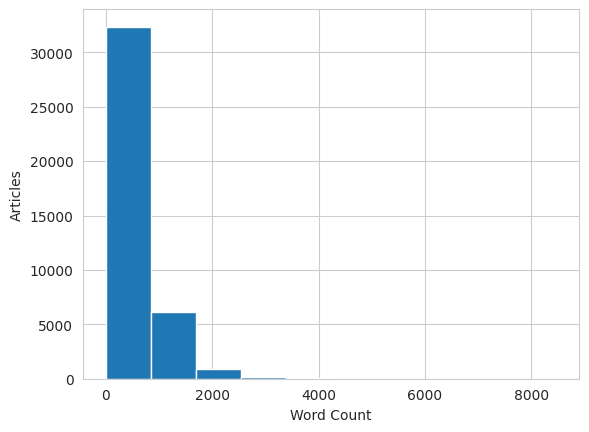

In [64]:
fig = news["n_tokens_content"].hist()
fig.set_xlabel("Word Count")
fig.set_ylabel("Articles");

In [65]:
# min max scaling
news["minmax"] = preproc.minmax_scale(news["n_tokens_content"])

In [66]:
# standardization
news["standardized"] = preproc.StandardScaler().fit_transform(
    news[["n_tokens_content"]]
)

In [67]:
# l1 normalization
news["normalized_l1"] = preproc.normalize(news[["n_tokens_content"]], norm='l1', axis=0)

In [68]:
# l2 normalization
news["normalized_l2"] = preproc.normalize(news[["n_tokens_content"]], norm='l2', axis=0)

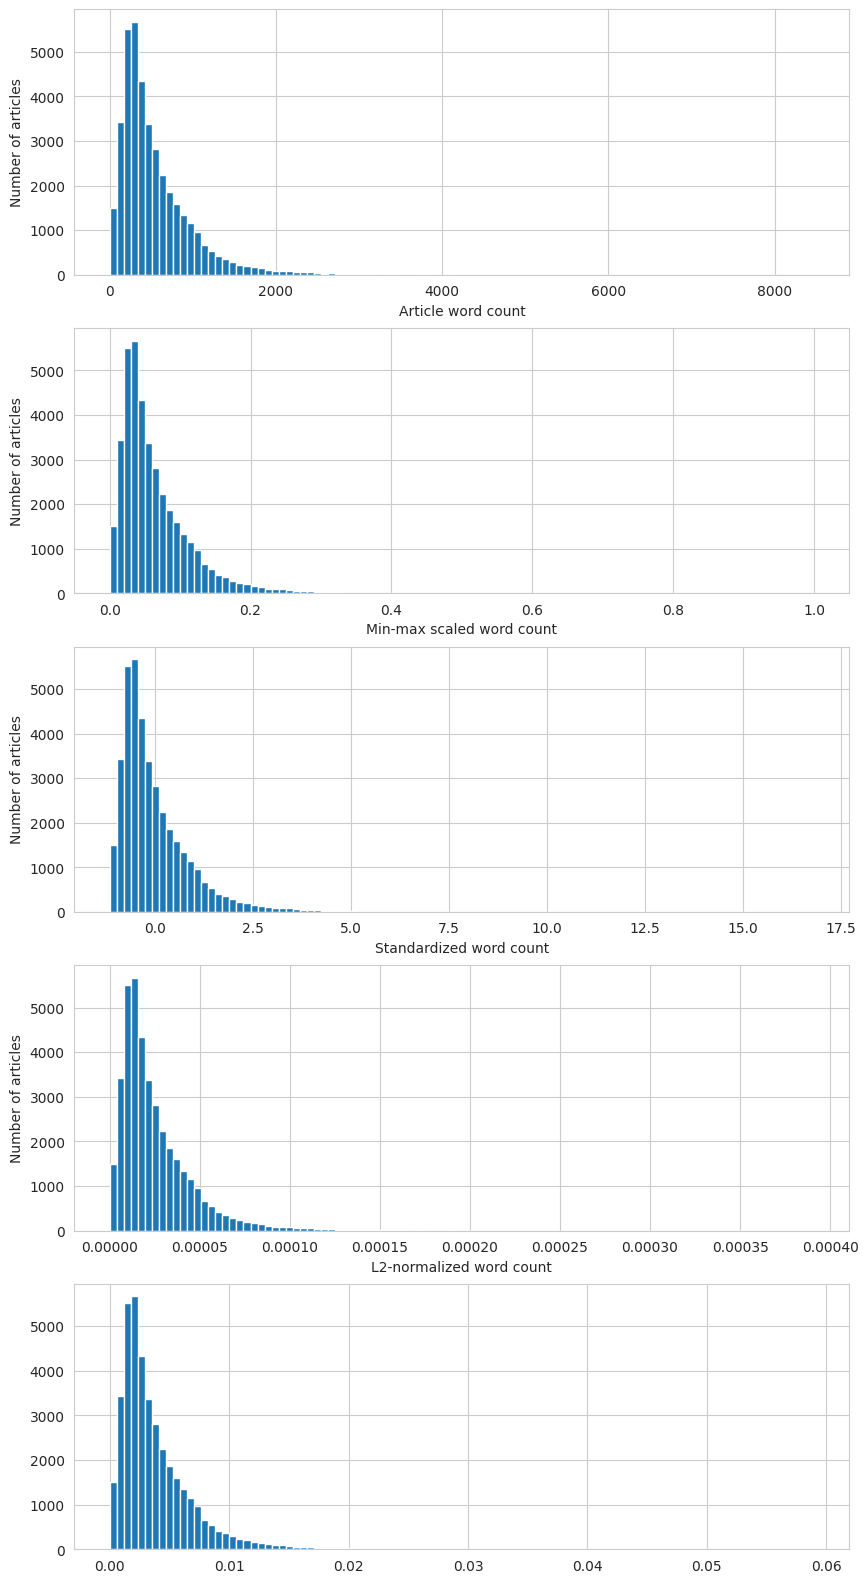

In [69]:
# compare different results
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 20))
# fig.tight_layout();
news["n_tokens_content"].hist(ax=ax1, bins=100)
ax1.set_xlabel("Article word count")
ax1.set_ylabel("Number of articles")
news["minmax"].hist(ax=ax2, bins=100)
ax2.set_xlabel("Min-max scaled word count")
ax2.set_ylabel("Number of articles")
news["standardized"].hist(ax=ax3, bins=100)
ax3.set_xlabel("Standardized word count")
ax3.set_ylabel("Number of articles")
news["normalized_l1"].hist(ax=ax4, bins=100)
ax4.set_xlabel("L1-normalized word count")
ax4.set_ylabel("Number of articles")
news["normalized_l2"].hist(ax=ax5, bins=100)
ax4.set_xlabel("L2-normalized word count")
ax4.set_ylabel("Number of articles");

### Power Transforms

For investigating power transforms, we will look at an example we already discussed during our exploratory data analysis: the count of ratings per movie. 

In [70]:
# read in rating data
ratings = pd.read_csv(
    os.path.join(data_dir, "hetrec/user_ratedmovies.dat"), delimiter="\t"
)
ratings.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855598 entries, 0 to 855597
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   userID       855598 non-null  int64  
 1   movieID      855598 non-null  int64  
 2   rating       855598 non-null  float64
 3   date_day     855598 non-null  int64  
 4   date_month   855598 non-null  int64  
 5   date_year    855598 non-null  int64  
 6   date_hour    855598 non-null  int64  
 7   date_minute  855598 non-null  int64  
 8   date_second  855598 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 58.7 MB


In [71]:
# asymmetric, skewed distribution
# number of ratings per movie
rating_counts = ratings.groupby("movieID")["rating"].agg("count")

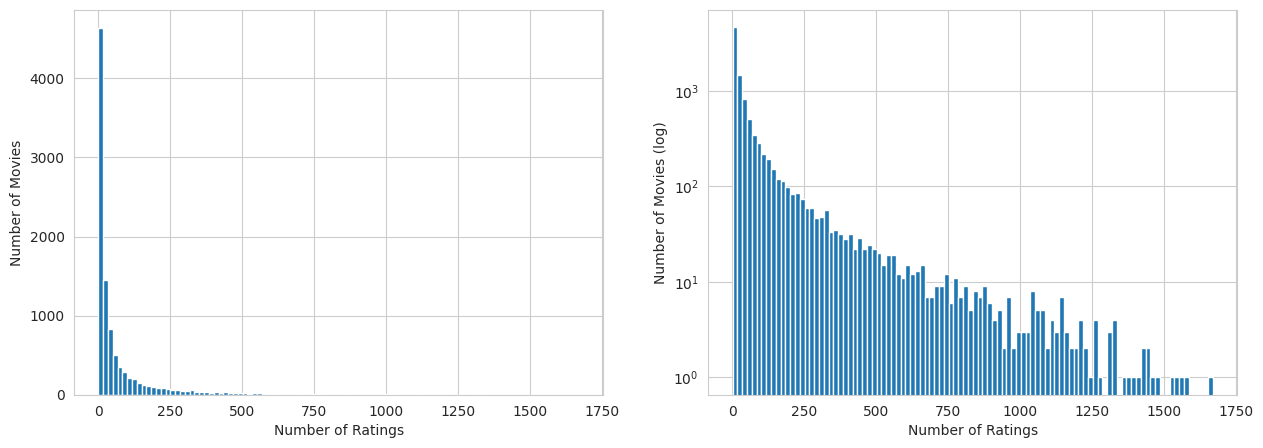

In [72]:
# histogram of number of movies with given number of ratings
# (binned value counts)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].hist(rating_counts, bins=100)
axes[0].set_ylabel("Number of Movies")
axes[0].set_xlabel("Number of Ratings")
axes[1].hist(rating_counts, log=True, bins=100)
axes[1].set_ylabel("Number of Movies (log)")
axes[1].set_xlabel("Number of Ratings");

Another example is the number of words in an article as already shown previously as part of the news popularity dataset.

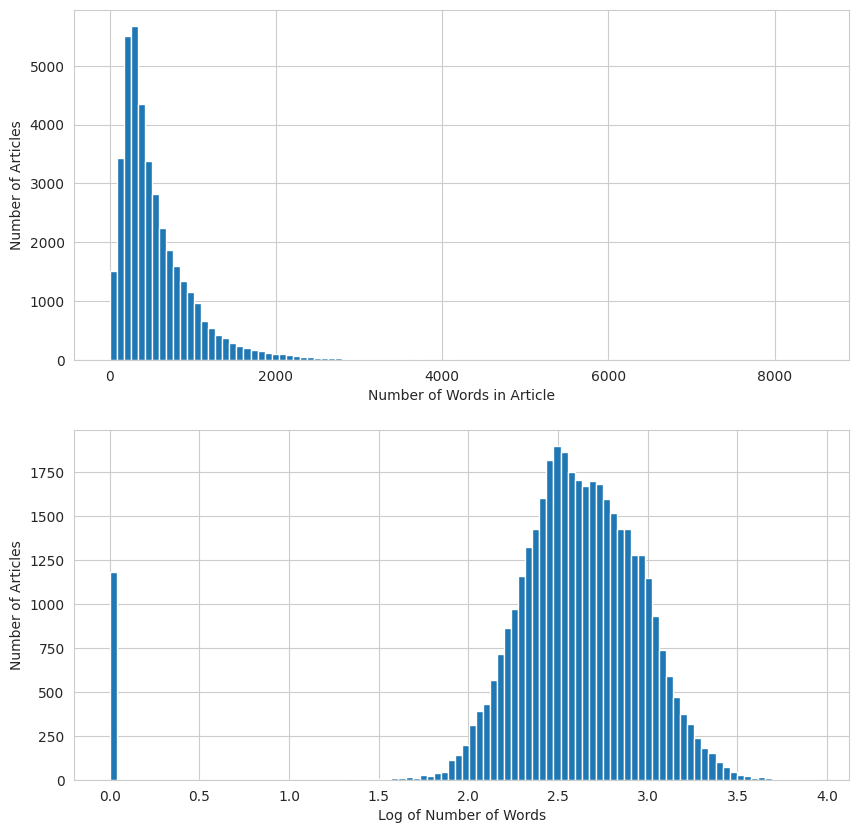

In [73]:
# shift + 1 due to log(0)
news["log_n_tokens_content"] = np.log10(news["n_tokens_content"] + 1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
news["n_tokens_content"].hist(ax=ax1, bins=100)
ax1.set_xlabel("Number of Words in Article")
ax1.set_ylabel("Number of Articles")
news["log_n_tokens_content"].hist(ax=ax2, bins=100)
ax2.set_xlabel("Log of Number of Words")
ax2.set_ylabel("Number of Articles");

In [74]:
# box-cox transform
# again, +1 as boxcox expects data to be positive
# log transform
news["n_tokens_content_lmbda0"] = stats.boxcox(
    news["n_tokens_content"] + 1, lmbda=0
)

# as close to normal distribution as possible (optimal box-cox transform)
# If the lmbda parameter is None, the second returned argument
# is the lambda that maximizes the log-likelihood function.
values, lambda_param = stats.boxcox(news["n_tokens_content"] + 1)
news["n_tokens_content_opt"] = values
lambda_param

np.float64(0.38045297261851435)

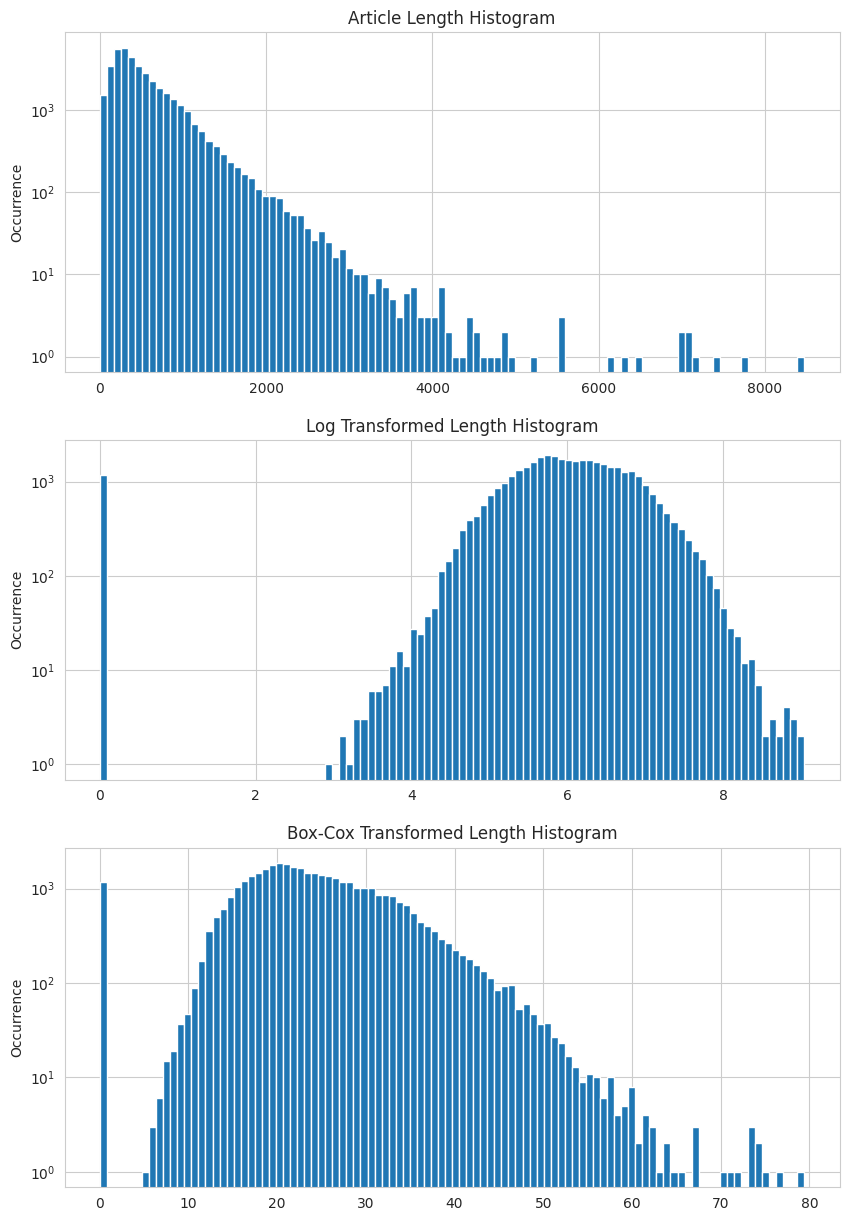

In [75]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

news["n_tokens_content"].hist(ax=ax1, bins=100)
ax1.set_yscale("log")
ax1.set_title("Article Length Histogram")
ax1.set_xlabel("")
ax1.set_ylabel("Occurrence")

news["n_tokens_content_lmbda0"].hist(ax=ax2, bins=100)
ax2.set_yscale("log")
ax2.set_title("Log Transformed Length Histogram")
ax2.set_xlabel("")
ax2.set_ylabel("Occurrence")

news["n_tokens_content_opt"].hist(ax=ax3, bins=100)
ax3.set_yscale("log")
ax3.set_title("Box-Cox Transformed Length Histogram")
ax3.set_xlabel("")
ax3.set_ylabel("Occurrence");

### Discretization

In a first step, we will look at synthetic count data: we create uniformly distributed random counts (once small values, once with a wide range).

In [76]:
# uniformly distributed, small values
small_counts = np.random.randint(0, 100, 20)
small_counts

array([59, 59, 83, 93, 49, 95, 15, 14, 80, 14, 88,  8, 90, 63, 86, 49,  9,
       99, 42, 58])

In [77]:
# fixed width binning by division
np.floor_divide(small_counts, 10)

array([5, 5, 8, 9, 4, 9, 1, 1, 8, 1, 8, 0, 9, 6, 8, 4, 0, 9, 4, 5])

In [78]:
# counts spanning a wide value range
large_counts = [
    296,
    8286,
    64011,
    80,
    3,
    725,
    867,
    2215,
    7689,
    11495,
    91897,
    44,
    28,
    7971,
    926,
    122,
    22222,
]

In [79]:
# fixed width binning via powers of 10 (0-9, 10-99, 100-999, 1000-9999, etc.)
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

In the next step, we look at quantile binning to avoid empty bins.

In [80]:
# compute 10 deciles
deciles = rating_counts.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
deciles

0.1      2.0
0.2      5.0
0.3      8.0
0.4     13.0
0.5     21.0
0.6     34.0
0.7     56.0
0.8    104.0
0.9    230.0
Name: rating, dtype: float64

In [81]:
# actually use deciles to bin data
pd.qcut(rating_counts, 10)

movieID
1        (230.0, 1670.0]
2        (230.0, 1670.0]
3        (230.0, 1670.0]
4           (34.0, 56.0]
5         (104.0, 230.0]
              ...       
65088       (0.999, 2.0]
65091       (0.999, 2.0]
65126       (0.999, 2.0]
65130       (0.999, 2.0]
65133         (2.0, 5.0]
Name: rating, Length: 10109, dtype: category
Categories (10, interval[float64, right]): [(0.999, 2.0] < (2.0, 5.0] < (5.0, 8.0] < (8.0, 13.0] ... (34.0, 56.0] < (56.0, 104.0] < (104.0, 230.0] < (230.0, 1670.0]]

<Axes: >

Text(0.5, 0, 'Review Count (log)')

Text(0, 0.5, 'Occurrence (log)')

Text(0.5, 0, 'Review Count (log)')

Text(0, 0.5, 'Occurrence (log)')

Text(0.5, 0, 'Review Count (log)')

Text(0, 0.5, 'Occurrence (log)')

Text(0.5, 0, 'Review Count (log)')

Text(0, 0.5, 'Occurrence (log)')

Text(0.5, 0, 'Review Count (log)')

Text(0, 0.5, 'Occurrence (log)')

Text(0.5, 0, 'Review Count (log)')

Text(0, 0.5, 'Occurrence (log)')

Text(0.5, 0, 'Review Count (log)')

Text(0, 0.5, 'Occurrence (log)')

Text(0.5, 0, 'Review Count (log)')

Text(0, 0.5, 'Occurrence (log)')

Text(0.5, 0, 'Review Count (log)')

Text(0, 0.5, 'Occurrence (log)')

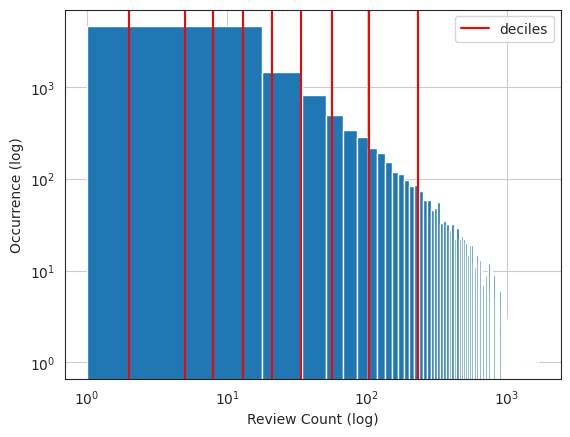

In [82]:
# Visualize the deciles on the histogram
sns.set_style("white");
fig, ax = plt.subplots();
rating_counts.hist(ax=ax, bins=100);
for pos in deciles:
    handle = plt.axvline(pos, color="r")
    ax.legend([handle], ["deciles"])
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_xlabel("Review Count (log)")
    ax.set_ylabel("Occurrence (log)");

<Axes: >

Text(0.5, 0, 'Review Count (log)')

Text(0, 0.5, 'Occurrence')

Text(0.5, 0, 'Review Count (log)')

Text(0, 0.5, 'Occurrence')

Text(0.5, 0, 'Review Count (log)')

Text(0, 0.5, 'Occurrence')

Text(0.5, 0, 'Review Count (log)')

Text(0, 0.5, 'Occurrence')

Text(0.5, 0, 'Review Count (log)')

Text(0, 0.5, 'Occurrence')

Text(0.5, 0, 'Review Count (log)')

Text(0, 0.5, 'Occurrence')

Text(0.5, 0, 'Review Count (log)')

Text(0, 0.5, 'Occurrence')

Text(0.5, 0, 'Review Count (log)')

Text(0, 0.5, 'Occurrence')

Text(0.5, 0, 'Review Count (log)')

Text(0, 0.5, 'Occurrence')

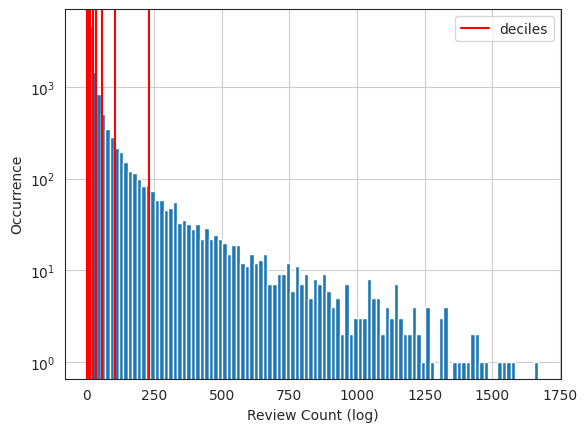

In [83]:
# Visualize the deciles on the histogram - now with x-axis not on log scale
sns.set_style("white")
fig, ax = plt.subplots()
rating_counts.hist(ax=ax, bins=100)
for pos in deciles:
    handle = plt.axvline(pos, color="r")
    ax.legend([handle], ["deciles"])
    ax.set_yscale("log")
    ax.set_xlabel("Review Count (log)")
    ax.set_ylabel("Occurrence");

### Discretization: Clustering

In the following, we will dive into clustering algorithms based on a synthetic data set randomly created.

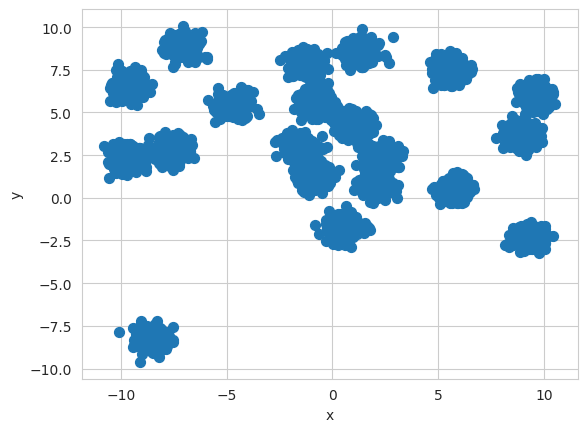

In [116]:
X, y_true = sklearn.datasets.make_blobs(
    n_samples=5000, centers=20, cluster_std=0.4, random_state=0
)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel("x")
plt.ylabel("y");

Now we can compute k-means and also experiment with the number of clusters to be chosen.

In [117]:
# compute kmeans, repeat 10 times
# init can be 'kmeans++', 'random'
kmeans = KMeans(n_clusters=5, init="random", n_init=10, max_iter=200)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

KMeans(init='random', max_iter=200, n_clusters=5, n_init=10)

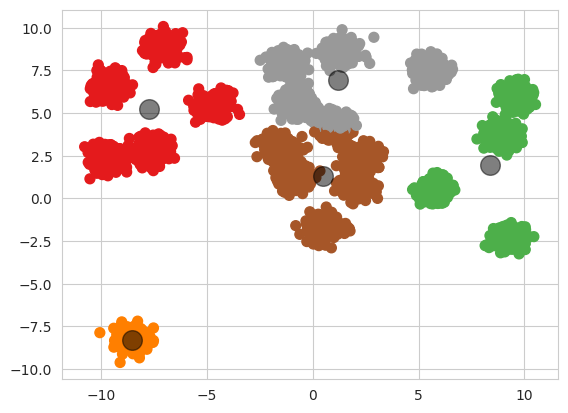

In [118]:
# visualize results
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap="Set1")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5);

For determining the number of clusters k, we can compute the sum of squared errors of each point to their closest cluster center for different k.

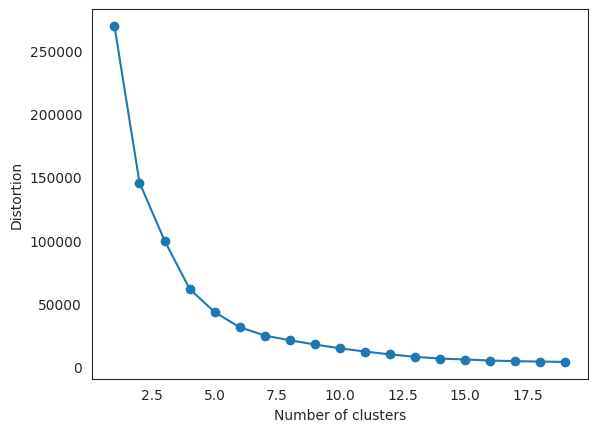

In [87]:
# calculate sum of squared errors for different k
k_candidates = range(1, 20)
sse = []
for i in k_candidates:
    km = KMeans(n_clusters=i, init="random", n_init=20, max_iter=200)
    km.fit(X)
    sse.append(km.inertia_)

# plot
plt.plot(k_candidates, sse, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show();

The following example decomposes k-means into the expectation and the maximization steps (taken from DSHandbook):

Text(0.98, 0.98, 'Random Initialization')

/tmp/ipykernel_133549/3912244357.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], c=c, cmap="inferno", s=50 * factor, alpha=1)


Text(0.4967141530112327, 3.861735698828815, '')

Text(0.6476885381006925, 5.523029856408026, '')

Text(-0.23415337472333597, 3.7658630430508193, '')

Text(1.5792128155073915, 4.7674347291529084, '')

Text(0.95, 0.95, 'E-Step')

Text(0.95, 0.95, 'M-Step')

Text(1.617884036481574, 1.7302164268618159, '')

Text(-1.05544831815144, 7.31289000117005, '')

Text(-1.5304909178700825, 2.8944167383856816, '')

Text(1.5802860667196599, 4.421012702817745, '')

Text(0.95, 0.95, 'E-Step')

Text(0.95, 0.95, 'M-Step')

Text(1.9825828101483296, 0.8677131436145118, '')

Text(-1.3732439791827424, 7.75368870941779, '')

Text(-1.570847026766382, 2.8553540230789376, '')

Text(0.9700766645513808, 4.415327315087125, '')

Text(0.95, 0.95, 'E-Step')

Text(0.95, 0.95, 'M-Step')

Text(0.98, 0.98, 'Final Clustering')

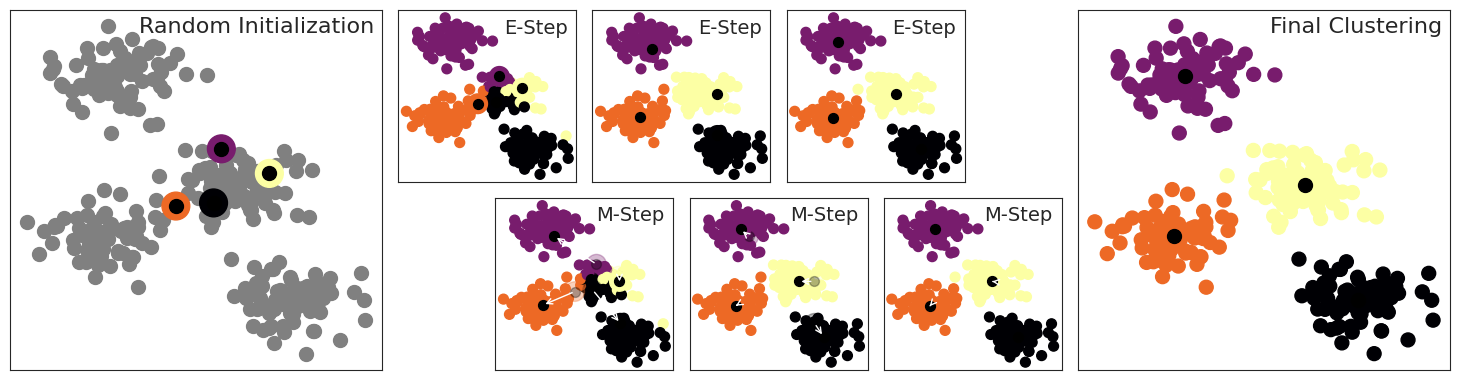

In [88]:
X, y_true = sklearn.datasets.make_blobs(
    n_samples=300, centers=4, cluster_std=0.60, random_state=0
)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)


def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap="inferno", s=50 * factor, alpha=1)


def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(
        centers[:, 0],
        centers[:, 1],
        c=np.arange(4),
        cmap="inferno",
        s=200 * factor,
        alpha=alpha,
    )
    ax.scatter(
        centers[:, 0], centers[:, 1], c="black", s=50 * factor, alpha=alpha
    )


def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax


fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(
    4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2
)
ax0 = make_ax(fig, gs[:4,:4])
ax0.text(
    0.98,
    0.98,
    "Random Initialization",
    transform=ax0.transAxes,
    ha="right",
    va="top",
    size=16,
)
draw_points(ax0, "gray", factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])

    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)

    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        ax2.annotate(
            "",
            new_centers[i],
            centers[i],
            arrowprops=dict(arrowstyle="->", linewidth=1),
        )

    # Finish iteration
    centers = new_centers
    ax1.text(
        0.95,
        0.95,
        "E-Step",
        transform=ax1.transAxes,
        ha="right",
        va="top",
        size=14,
    )
    ax2.text(
        0.95,
        0.95,
        "M-Step",
        transform=ax2.transAxes,
        ha="right",
        va="top",
        size=14,
    )


# Final E-step
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(
    0.98,
    0.98,
    "Final Clustering",
    transform=axf.transAxes,
    ha="right",
    va="top",
    size=16,
)

In [ ]:
# compute dbscan, repeat 10 times
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)
y_dbscan = dbscan.labels_

DBSCAN()

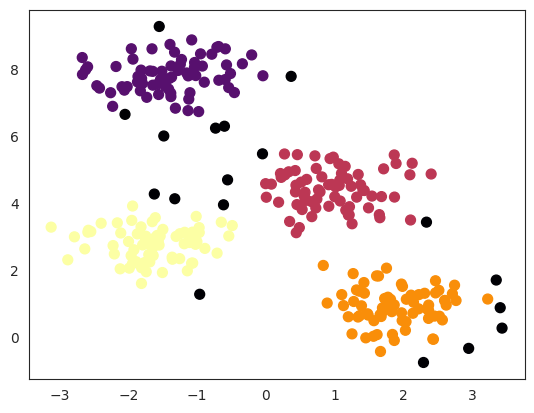

In [90]:
# visualize results
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap="inferno")

### Text Data Features

In the following, we will look at different representations of text and feature extraction methods for text. We will make use of the Yelp Dataset (https://www.kaggle.com/yelp-dataset/yelp-dataset): "This dataset is a subset of Yelp's businesses, reviews, and user data. It was originally put together for the Yelp Dataset Challenge which is a chance for students to conduct research or analysis on Yelp's data and share their discoveries. In the most recent dataset you'll find information about businesses across 8 metropolitan areas in the USA and Canada." This example is adapted from the FeatEng book.

<div class="alert alert-block alert-info">
<b>Note:</b> As the dataset is simply too large to store it on gitlab, please download the dataset directly using the link above, unzip it and store it in the data directory..</div>

In [91]:
# read in review data
# restrict to first 5000 reviews
with open(os.path.join(data_dir, "yelp_academic_dataset_review.json")) as fh:
    lines_read = 0
    data = []
    for line in fh:
        data.append(json.loads(line))
        lines_read += 1
        if lines_read == 5000:
            break
reviews = pd.DataFrame(data)

In [92]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    5000 non-null   object 
 1   user_id      5000 non-null   object 
 2   business_id  5000 non-null   object 
 3   stars        5000 non-null   float64
 4   useful       5000 non-null   int64  
 5   funny        5000 non-null   int64  
 6   cool         5000 non-null   int64  
 7   text         5000 non-null   object 
 8   date         5000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 351.7+ KB


In [121]:
# inspect five review
pd.set_option("display.max_colwidth", None)
for _ in range(5):
    reviews.sample(1)["text"]

2324    Superb!  Took the family the Friday after Thanksgiving.  Service was impeccable.  Food was superb.  Restaurant was beautiful.  Won't go on too long because the other reviews say it all.  Just adding my humble opinion on this wonderful establishment.
Name: text, dtype: object

2021    Just a hungry yelper looking for something easy, off the beaten path, and free from logos and slogans. Well, the place wasn't as independent as I was hoping. Still a fair commercial feel going on inside complete with ™s on the menu. Corporate places can get the theme down and polished but sometimes lack in authenticity once the place is running.\n\nThe place is kind of like a cross between Quisnos and Jimmy Johns. The sandwiches are very meat-centric. The feel of the place is like they were trying for a bit of an east coast vibe but the only part they really got to was the random yelling of words by the staff.\n\nI get to the line, browse through the quite large bottled beverage selection to see all the typical mass-produced overly sugary selections. Passed on the beverages. Moved passed to order my sandwich. Opted for A Wreck for myself who's ingredients read like an Italian sandwich, and a Hammie for the kiddo. It's ham and cheese.\n\nI was a bit impressed with guy1's calm de

2108    The Blind Onion is pretty dark and smoky for a restaurant, almost more of a dive bar with pizza than a pizza place you can smoke in.\nNothing super fancy among the options, just good pizza (thin crust style) done right. It's a shame about all the divey atmosphere though, I'm really not into that much smoke when I eat, although this location can be more fun to grab a beer at as it's usually busier than the other locations.
Name: text, dtype: object

1842    Small little place but extremely friendly staff, delicious poutine, sandwich and dips for the fries.
Name: text, dtype: object

2750    Came here for little steamed buns.   Result, stay with steamed buns only because other stuff like soups and tofu dishes are horrible. \nThe owner is pretty grumpy too. But it is a normal thing in Vancouver area Chinese places.
Name: text, dtype: object

In [94]:
# extract bag-of-words
bow_converter = text.CountVectorizer(token_pattern="(?u)\\b\\w+\\b")
bow = bow_converter.fit_transform(reviews["text"])
bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 371018 stored elements and shape (5000, 19525)>

In [95]:
# bow returns a sparse matrix, extract feature name mapping
words = bow_converter.get_feature_names_out()
words[:10]
np.random.choice(words, 20)

array(['0', '00', '000', '00am', '00pm', '01', '02', '05', '07', '08'],
      dtype=object)

array(['holders', 'tin', 'wellesley', 'twig', 'server', 'tastiness',
       'mandatory', 'princesses', 'tale', 'barefoot', 'shamrock', 'mamas',
       'announcing', 'nye', 'crannies', 'são', 'gau', 'matchstick',
       'drenched', 'overabundance'], dtype=object)

In [96]:
# size of vocabulary
len(words)

19525

In [124]:
# extract bag-of-bigrams
bigram_converter = text.CountVectorizer(
    # The default regexp select tokens of 2 or more alphanumeric characters (punctuation is completely ignored and always treated as a token separator).
    ngram_range=(2, 2), token_pattern="(?u)\\b\\w\\w+\\b"
)
bob = bigram_converter.fit_transform(reviews["text"])

In [98]:
# extract feature name mapping
bigrams = bigram_converter.get_feature_names_out()
bigrams[:10]
np.random.choice(bigrams, 20)

array(['0 1', '0 2', '0 25', '0 30', '0 4', '0 40', '0 50', '0 9mi',
       '0 books', '0 environment'], dtype=object)

array(['we recently', 'legit revamped', 'dinner money', '4 corners',
       '30 seconds', 'hold off', 'sober i', 'indian come', 'love carbs',
       'front area', 'pulled out', 'offers food', 'staff handles',
       'something naughty', 'if she', 'extremely complicated', 'the guru',
       'limited syrup', '2 salsa', 'suggest never'], dtype=object)

In [99]:
# size of bigram vocabulary
len(bigrams)

193577

In [100]:
# extract bag-of-trirams
trigram_converter = text.CountVectorizer(
    ngram_range=(3, 3), token_pattern="(?u)\\b\\w+\\b"
)
bot = trigram_converter.fit_transform(reviews["text"])

In [101]:
# extract feature name mapping
trigrams = trigram_converter.get_feature_names_out()
trigrams[:10]
np.random.choice(trigrams, 20)

array(['0 1 stars', '0 25 oysters', '0 30 possible', '0 4 miles',
       '0 40 oz', '0 50 for', '0 9mi 22min', '0 books on',
       '0 environment 5', '0 i would'], dtype=object)

array(['lived in pdx', 'quick and not', 'about the weird',
       'a whole drink', 'anything into an', 'usually i prefer',
       'hesitate to say', 'the i m', 'her name was', 'always amazing i',
       'experience horrible customer', 'not stand out',
       'reached exactly at', 'this is to', 'waiting room while',
       'thankfully i wasn', 'amazing they care', 'she has some',
       'ma am what', 'a truly exquisite'], dtype=object)

In [102]:
# size of trigram vocabulary
len(trigrams)

409449

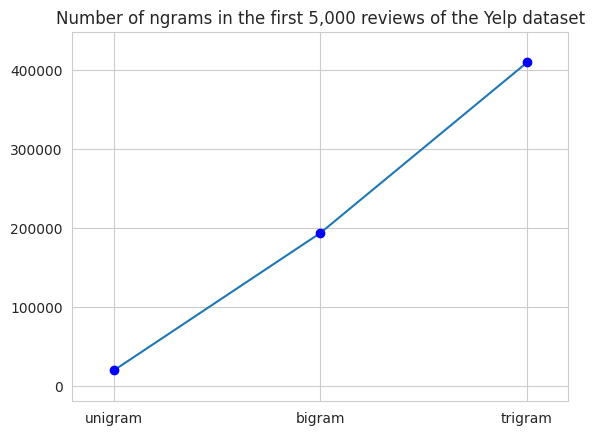

In [103]:
# compare vocabulary size of uni, bi, and trigrams
sns.set_style("whitegrid")
counts = [len(words), len(bigrams), len(trigrams)]
plt.plot(counts)
plt.plot(counts, "bo")
plt.margins(0.1)
plt.xticks(range(3), ["unigram", "bigram", "trigram"])
plt.title("Number of ngrams in the first 5,000 reviews of the Yelp dataset")
plt.show();

In [104]:
# Create the tf-idf representation using the bag-of-words matrix
tfidf_transformer = text.TfidfTransformer(norm=None, use_idf=True)
tf_idf = tfidf_transformer.fit_transform(bob)
tfidf_transformer.get_feature_names_out()
print(tf_idf.shape)

array(['x0', 'x1', 'x2', ..., 'x193574', 'x193575', 'x193576'],
      dtype=object)

(5000, 193577)


### Categorical Features

The following example showcases encoding of categorical variables (dataset and code adapted from FeatEng).

In [105]:
# renting data per city
rent_data = pd.DataFrame(
    {
        "City": [
            "SF",
            "SF",
            "SF",
            "NYC",
            "NYC",
            "NYC",
            "Seattle",
            "Seattle",
            "Seattle",
        ],
        "Rent": [3999, 4000, 4001, 3499, 3500, 3501, 2499, 2500, 2501],
    }
)

In [106]:
# inspect data
rent_data
rent_data["Rent"].mean()

City  Rent
0       SF  3999
1       SF  4000
2       SF  4001
3      NYC  3499
4      NYC  3500
5      NYC  3501
6  Seattle  2499
7  Seattle  2500
8  Seattle  2501

np.float64(3333.3333333333335)

In [107]:
# convert categorical variable (city) to one-hot-encoding
one_hot_rent = pd.get_dummies(rent_data, prefix=["city"])
one_hot_rent

Rent  city_NYC  city_SF  city_Seattle
0  3999     False     True         False
1  4000     False     True         False
2  4001     False     True         False
3  3499      True    False         False
4  3500      True    False         False
5  3501      True    False         False
6  2499     False    False          True
7  2500     False    False          True
8  2501     False    False          True

In [108]:
# fit a linear regression model
# y = w1x1 + ... + wnxn + b
lin_reg = linear_model.LinearRegression()
lin_reg.fit(
    one_hot_rent[["city_NYC", "city_SF", "city_Seattle"]], one_hot_rent["Rent"]
)

# inspect regression coefficients (y = w1x1 + ... + wnxn + b)
# for one-hot encoding
# coefficients: difference from global mean
# intercept: global mean of rent
lin_reg.coef_
lin_reg.intercept_

LinearRegression()

array([ 166.66666667,  666.66666667, -833.33333333])

np.float64(3333.3333333333335)

In [109]:
# convert categorical variable (city) to dummy coding
# reference level not shown anymore
dummy_rent = pd.get_dummies(rent_data, prefix=["city"], drop_first=True)
dummy_rent

Rent  city_SF  city_Seattle
0  3999     True         False
1  4000     True         False
2  4001     True         False
3  3499    False         False
4  3500    False         False
5  3501    False         False
6  2499    False          True
7  2500    False          True
8  2501    False          True

In [110]:
# inspect regression coefficients (y = w1x1 + ... + wnxn + b)
# for dummy coding:
# coefficients: difference per category to mean of reference category
# intercept: mean of reference category
lin_reg.fit(dummy_rent[["city_SF", "city_Seattle"]], dummy_rent["Rent"])
lin_reg.coef_
lin_reg.intercept_

LinearRegression()

array([  500., -1000.])

np.float64(3500.0)

In the following, we will briefly dive into feature hashing based on the Yelp review dataset used previously.

In [125]:
# we will define m as equal to the unique number of business_id
m = len(reviews.business_id.unique())
print(m)

2795


## Expanding Features

### Value Imputation

Different imputation methods showcased, adapted from CleanData.

In [ ]:
def read_derm_data():
    np.random.seed(1)

    # Histopathological Attributes: (values 0, 1, 2, 3)
    # Clinical Attributes: (values 0, 1, 2, 3, unless indicated)
    features = [
        "erythema",
        "scaling",
        "definite borders",
        "itching",
        "koebner phenomenon",
        "polygonal papules",
        "follicular papules",
        "oral mucosal involvement",
        "knee and elbow involvement",
        "scalp involvement",
        "family history",  # 0 or 1
        "melanin incontinence",
        "eosinophils in the infiltrate",
        "PNL infiltrate",
        "fibrosis of the papillary dermis",
        "exocytosis",
        "acanthosis",
        "hyperkeratosis",
        "parakeratosis",
        "clubbing of the rete ridges",
        "elongation of the rete ridges",
        "thinning of the suprapapillary epidermis",
        "spongiform pustule",
        "munro microabcess",
        "focal hypergranulosis",
        "disappearance of the granular layer",
        "vacuolisation and damage of basal layer",
        "spongiosis",
        "saw-tooth appearance of retes",
        "follicular horn plug",
        "perifollicular parakeratosis",
        "inflammatory monoluclear inflitrate",
        "band-like infiltrate",
        "Age",  # linear; missing marked '?'
        "TARGET",  # See mapping
    ]

    targets = {
        1: "psoriasis",  # 112 instances
        2: "seboreic dermatitis",  # 61
        3: "lichen planus",  # 72
        4: "pityriasis rosea",  # 49
        5: "cronic dermatitis",  # 52
        6: "pityriasis rubra pilaris",  # 20
    }

    data = os.path.join(data_dir, "dermatology.data")
    df = pd.read_csv(data, header=None, names=features, na_values=["?"])
    df["TARGET"] = df.TARGET.map(targets)

    derm = df.copy()
    derm.loc[derm.Age == "?", "Age"] = None
    derm["Age"] = derm.Age.astype(float)
    return derm

In [ ]:
derm = read_derm_data()

In [ ]:
# use iloc on both axes and sample
derm.iloc[:, [0, 1, 2, 3, -2, -1]].sample(6)

erythema  scaling  definite borders  itching   Age               TARGET
247         2        2                 2        0  62.0            psoriasis
127         2        2                 2        2  44.0        lichen planus
230         3        2                 0        1  30.0  seboreic dermatitis
162         3        2                 2        2  22.0        lichen planus
159         3        2                 2        1  47.0  seboreic dermatitis
296         2        1                 1        3  19.0    cronic dermatitis

In [ ]:
clean, suspicious = [], {}
for col in derm.columns:
    values = derm[col].unique()
    if set(values) <= {0, 1, 2, 3}:
        clean.append(col)
    else:
        suspicious[col] = values

In [ ]:
print("No problem detected:")
pprint(clean[:8])
print(f"... {len(clean) - 8} other fields")

No problem detected:
['erythema',
 'scaling',
 'definite borders',
 'itching',
 'koebner phenomenon',
 'polygonal papules',
 'follicular papules',
 'oral mucosal involvement']
... 25 other fields


In [ ]:
# Notice age has some expected ages and also a '?'
print("Suspicious:")
pprint(suspicious)

Suspicious:
{'Age': array([55.,  8., 26., 40., 45., 41., 18., 57., 22., 30., 20., 21., 10.,
       65., 38., 23., 17., 51., 42., 44., 33., 43., 50., 34., nan, 15.,
       46., 62., 35., 48., 12., 52., 60., 32., 19., 29., 25., 36., 13.,
       27., 31., 28., 64., 39., 47., 16.,  0.,  7., 70., 37., 61., 67.,
       56., 53., 24., 58., 49., 63., 68.,  9., 75.]),
 'TARGET': array(['seboreic dermatitis', 'psoriasis', 'lichen planus',
       'cronic dermatitis', 'pityriasis rosea',
       'pityriasis rubra pilaris'], dtype=object)}


In [ ]:
# dataset encodes missing values as ?
# --> added ? to na_values list to be recognized when reading
# file in panda's read_csv
derm.loc[derm.Age.isnull()].iloc[:, -4:]
# alternatively:
# Assign missing ages marked with '?' as None
# derm.loc[derm.Age == '?', 'Age'] = None  # or NaN
# Convert string/None ages to floating-point
# derm['Age'] = derm.Age.astype(float)

inflammatory monoluclear inflitrate  band-like infiltrate  Age  \
33                                     0                     0  NaN   
34                                     0                     0  NaN   
35                                     0                     0  NaN   
36                                     0                     3  NaN   
262                                    3                     0  NaN   
263                                    2                     0  NaN   
264                                    3                     0  NaN   
265                                    3                     0  NaN   

                  TARGET  
33             psoriasis  
34      pityriasis rosea  
35   seboreic dermatitis  
36         lichen planus  
262    cronic dermatitis  
263    cronic dermatitis  
264    cronic dermatitis  
265    cronic dermatitis

#### Typical-Value Imputation 

In [ ]:
# detailed plot
# count values
age_stats = pd.DataFrame(
    [
        derm[derm.Age == x]["Age"].count()
        for x in np.arange(derm["Age"].min(), derm["Age"].max())
    ]
)

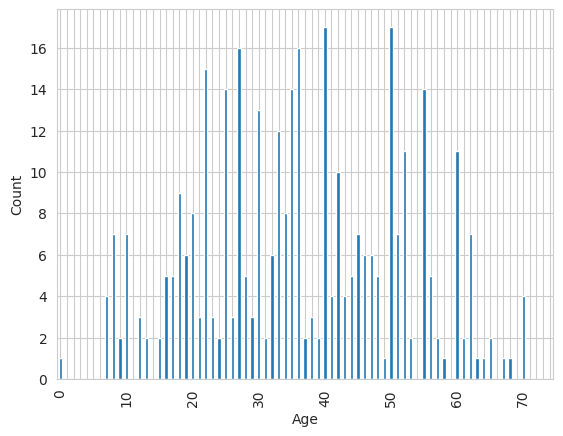

In [ ]:
# bar plot
plot = age_stats.plot(
    kind="bar",
    xlabel="Age",
    ylabel="Count",
    legend=False,
)

# adapt ticks on x-axis
for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

In [ ]:
# mean and median seem like best solution
derm.Age.mean(), derm.Age.median()

(36.29608938547486, 35.0)

In [ ]:
derm.Age.mode()

0    40.0
1    50.0
Name: Age, dtype: float64

Alternatively, this dataset was created in Turkey - we might also want to use domain knowledge and use the mean/median age in Turkey at the time of dataset creation.

In [ ]:
# use sklearn's SimpleImputer
imputer = SimpleImputer(strategy="mean")
# expects 2d array or dataframe
derm["Age_imputed"] = imputer.fit_transform(pd.DataFrame(derm["Age"]))

In [ ]:
derm.loc[derm.Age.isnull()].iloc[:, -4:]

band-like infiltrate  Age               TARGET  Age_imputed
33                      0  NaN            psoriasis    36.296089
34                      0  NaN     pityriasis rosea    36.296089
35                      0  NaN  seboreic dermatitis    36.296089
36                      3  NaN        lichen planus    36.296089
262                     0  NaN    cronic dermatitis    36.296089
263                     0  NaN    cronic dermatitis    36.296089
264                     0  NaN    cronic dermatitis    36.296089
265                     0  NaN    cronic dermatitis    36.296089

#### Locality Imputation

In [ ]:
# load digits dataset (adopted, now missing a few pixels)
digits = np.load(os.path.join(data_dir, "digits.npy"))
print("Array shape:", digits.shape)

Array shape: (50, 8, 8)


In [ ]:
# display digits
def show_digits(digits=digits, x=3, y=3, title="Digits"):
    "Display of 'corrupted numerals'"
    if digits.min() >= 0:
        newcm = cm.get_cmap("Greys", 17)
    else:
        gray = cm.get_cmap("Greys", 18)
        newcolors = gray(np.linspace(0, 1, 18))
        newcolors[:1,
                 ] = np.array([1.0, 0.9, 0.9, 1])
        newcm = ListedColormap(newcolors)

    fig, axes = plt.subplots(
        x,
        y,
        figsize=(x * 2.5, y * 2.5),
        subplot_kw={"xticks": (), "yticks": ()},
    )

    for ax, img in zip(axes.ravel(), digits):
        ax.imshow(img, cmap=newcm)
        for i in range(8):
            for j in range(8):
                if img[i, j] == -1:
                    s = "╳"
                    c = "k"
                else:
                    s = str(img[i, j])
                    c = "k" if img[i, j] < 8 else "w"
                _ = ax.text(j, i, s, color=c, ha="center", va="center")
    fig.suptitle(title, y=0)
    fig.tight_layout()

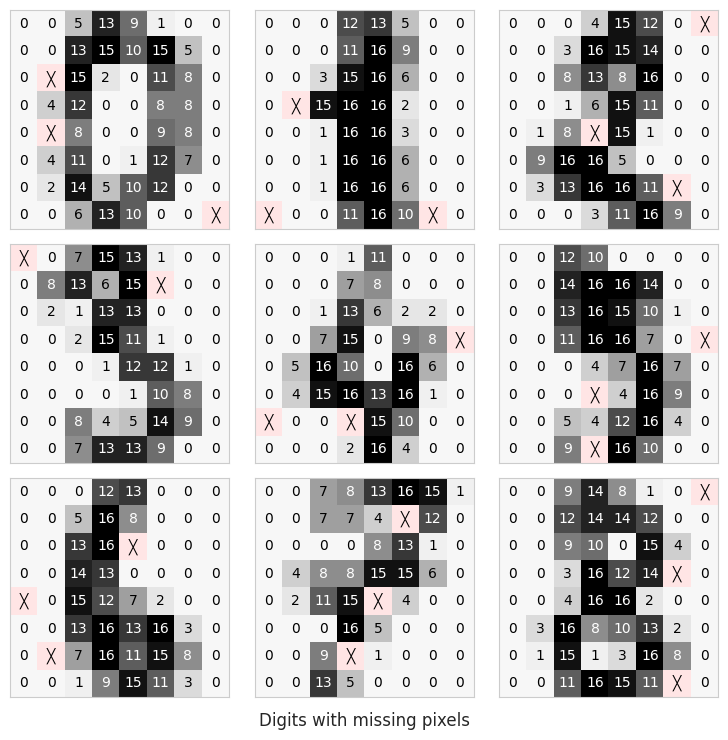

In [ ]:
show_digits(digits, title="Digits with missing pixels")

In [ ]:
# Coded for clarity, not for best vectorized speed
# Function definition only; used in later cell
def fill_missing(digit):
    digit = digit.copy()
    missing = np.where(digit == -1)
    for y, x in zip(*missing):  # Pull off x/y position of pixel
        # Do not want negative indices in slice
        x_start = max(0, x - 1)
        y_start = max(0, y - 1)
        # No harm in index larger than size
        x_end = x + 2
        y_end = y + 2
        # What if another -1 is in region? Remove all the -1s
        region = digit[y_start:y_end, x_start:x_end].flatten()
        region = region[region >= 0]
        total = np.sum(region)
        avg = total // region.size
        digit[y, x] = avg
    return digit

(None, None)

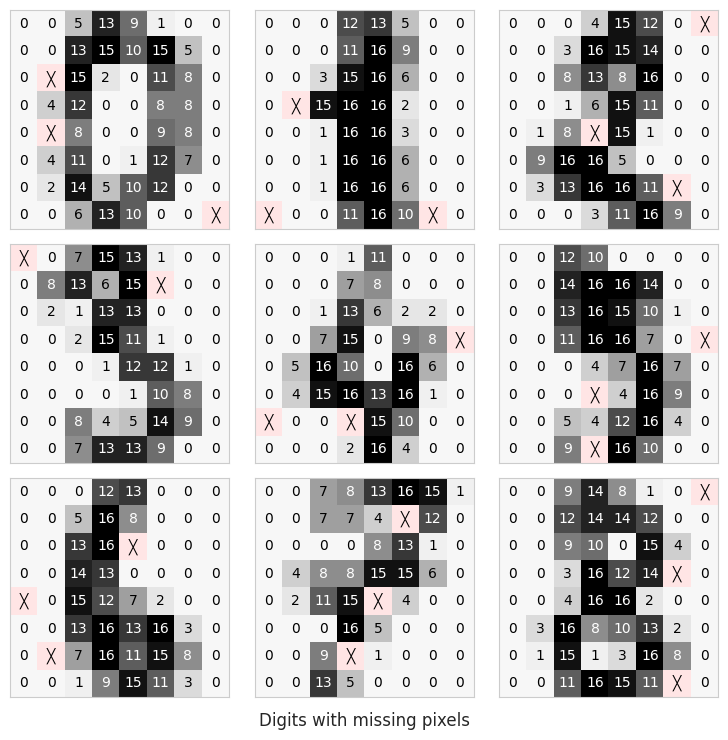

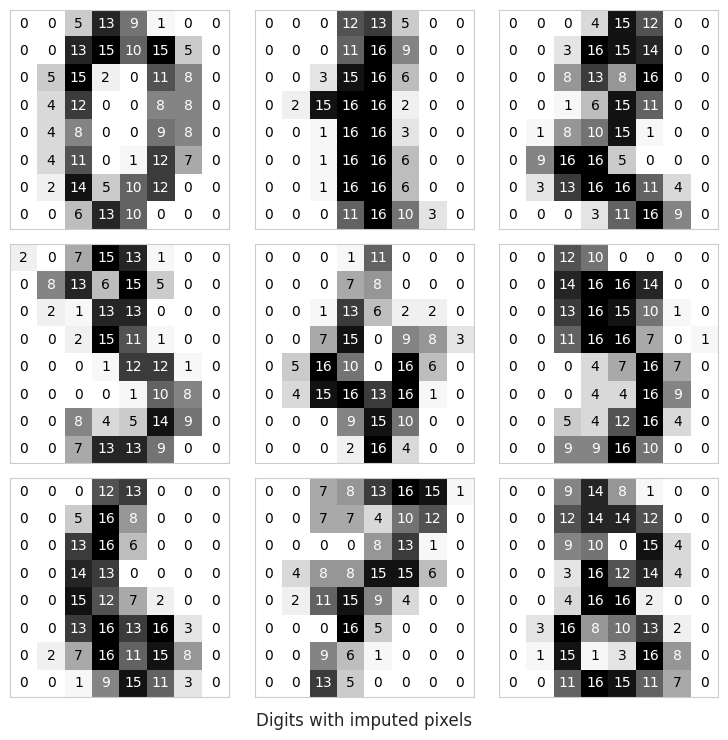

In [ ]:
new = np.empty_like(digits)
for n in range(new.shape[0]):
    new[n] = fill_missing(digits[n])

show_digits(digits, title="Digits with missing pixels"), show_digits(
    new, title="Digits with imputed pixels"
)

## Reducing Features

### Principal Component Analysis

The following initial examples are based on the iris datasets (directly loaded via scikit-learn). The dataset consists of 50 samples from three species of the iris flower and describes its sepals (Kelchblatt) and petals (Blütenblatt) (length and width). More information on the dataset can be found here: https://en.wikipedia.org/wiki/Iris_flower_data_set.

#### Example 2D -> 1D

Note that we could also load the iris dataset from scikit learn via the `load_iris` method and then convert it to a dataframe and reset the column names.

In [ ]:
# load iris dataset via sklearn
def load_iris():
    iris = sklearn.datasets.load_iris(as_frame=True)
    return iris.frame

In [ ]:
iris = load_iris()
iris

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

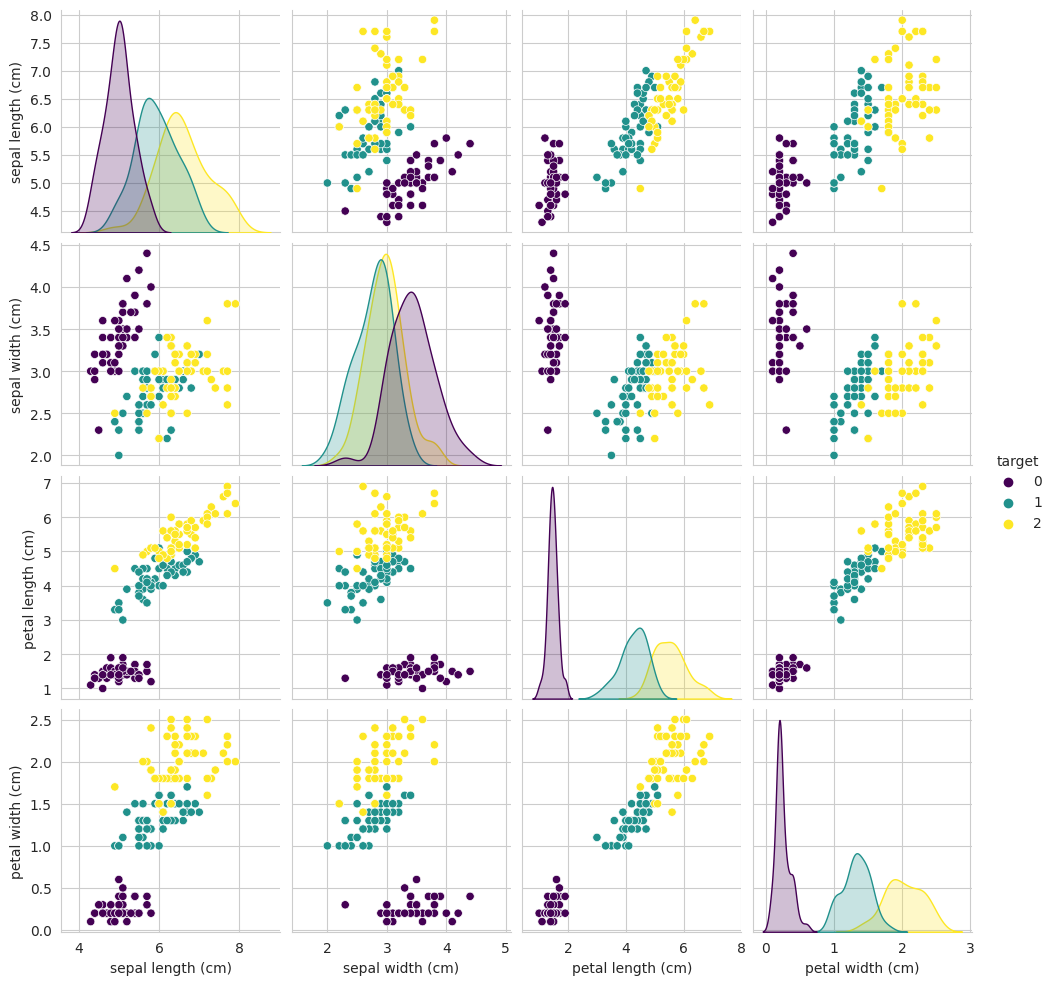

In [ ]:
# first look at data
sns.pairplot(iris, hue='target', palette="viridis");

In [ ]:
iris.cov()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           0.685694         -0.042434           1.274315   
sepal width (cm)           -0.042434          0.189979          -0.329656   
petal length (cm)           1.274315         -0.329656           3.116278   
petal width (cm)            0.516271         -0.121639           1.295609   
target                      0.530872         -0.152349           1.372483   

                   petal width (cm)    target  
sepal length (cm)          0.516271  0.530872  
sepal width (cm)          -0.121639 -0.152349  
petal length (cm)          1.295609  1.372483  
petal width (cm)           0.581006  0.597315  
target                     0.597315  0.671141

In [ ]:
iris.corr()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000

In [ ]:
def iris_preprocessing(iris_data):
    # encode species label as numeric value
    label_encoder = preprocessing.LabelEncoder()
    iris_data["species_id"] = label_encoder.fit_transform(iris.species)

    # scale values
    scaler = preprocessing.MinMaxScaler()
    iris_data[
        ["sepal_length", "sepal_width", "petal_length", "petal_width"]
    ] = scaler.fit_transform(
        iris_data[
            ["sepal_length", "sepal_width", "petal_length", "petal_width"]
        ]
    )
    return iris_data

In [ ]:
# preprocessing
iris = sns.load_dataset("iris")
iris = iris_preprocessing(iris)
iris[:10]

sepal_length  sepal_width  petal_length  petal_width species  species_id
0      0.222222     0.625000      0.067797     0.041667  setosa           0
1      0.166667     0.416667      0.067797     0.041667  setosa           0
2      0.111111     0.500000      0.050847     0.041667  setosa           0
3      0.083333     0.458333      0.084746     0.041667  setosa           0
4      0.194444     0.666667      0.067797     0.041667  setosa           0
5      0.305556     0.791667      0.118644     0.125000  setosa           0
6      0.083333     0.583333      0.067797     0.083333  setosa           0
7      0.194444     0.583333      0.084746     0.041667  setosa           0
8      0.027778     0.375000      0.067797     0.041667  setosa           0
9      0.166667     0.458333      0.084746     0.000000  setosa           0

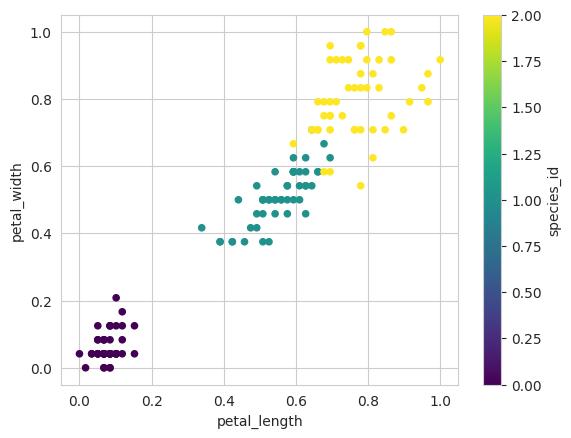

In [ ]:
ax = iris.plot.scatter(
    x="petal_length", y="petal_width", c="species_id", colormap="viridis"
);

In [ ]:
# apply PCA, reduce to a single dimension
petals = iris[["petal_length", "petal_width"]]
pca = PCA(n_components=1)
pca.fit(petals)
petals_1d = pca.transform(petals)

PCA(n_components=1)

In [ ]:
petals_1d[:15]

array([[-0.57712403],
       [-0.57712403],
       [-0.58873212],
       [-0.56551594],
       [-0.57712403],
       [-0.48157822],
       [-0.54676326],
       [-0.56551594],
       [-0.57712403],
       [-0.5958767 ],
       [-0.56551594],
       [-0.55390785],
       [-0.60748479],
       [-0.64230906],
       [-0.6003402 ]])

In [ ]:
# actual components of the PCA (principal axes)
pca.components_

array([[0.68487729, 0.72865842]])

In [ ]:
pca.explained_variance_ratio_

array([0.98149993])

In [ ]:
petals_inverse = pca.inverse_transform(petals_1d)

In [ ]:
petals

petal_length  petal_width
0        0.067797     0.041667
1        0.067797     0.041667
2        0.050847     0.041667
3        0.084746     0.041667
4        0.067797     0.041667
..            ...          ...
145      0.711864     0.916667
146      0.677966     0.750000
147      0.711864     0.791667
148      0.745763     0.916667
149      0.694915     0.708333

[150 rows x 2 columns]

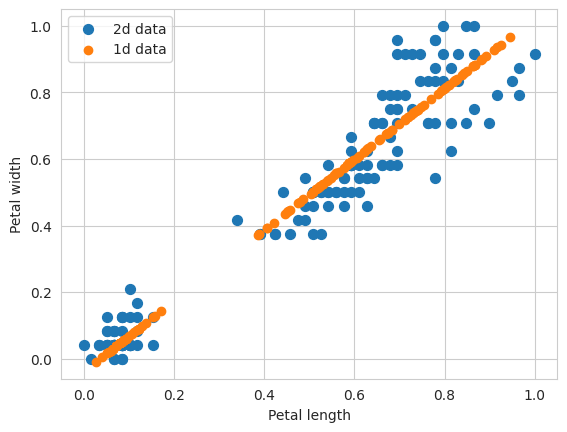

In [ ]:
# visualize sepals
plt.scatter(
    petals["petal_length"], petals["petal_width"], s=50, label="2d data"
)
plt.scatter(petals_inverse[:, 0], petals_inverse[:, 1], label="1d data")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend();

Text(0.5, 0, 'PC1')

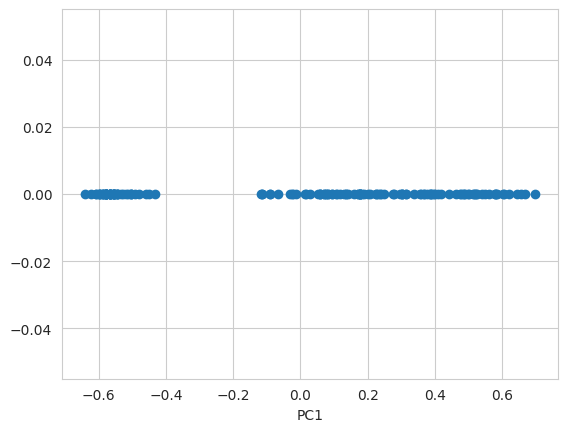

In [ ]:
plt.scatter(petals_1d, y=np.zeros(len(petals_1d)))
plt.xlabel("PC1")

#### Example 4D -> 2D

We will continue to use the iris dataset, but now use all four features.

<div class="alert alert-block alert-info">
<b>Note:</b> The follow code is based on plot.ly. To show plot.ly charts in this notebook in jupyer lab, we ned to install an extension: `jupyter labextension install @jupyter-widgets/jupyterlab-manager jupyterlab-plotly`</div>

In [ ]:
# load iris dataset from seaborne
iris = sns.load_dataset("iris")

/home/eva/.local/share/virtualenvs/data-engineering-analytics-notebooks-Qx0adyYX/lib/python3.10/site-packages/plotly/express/_core.py:279: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  dims = [


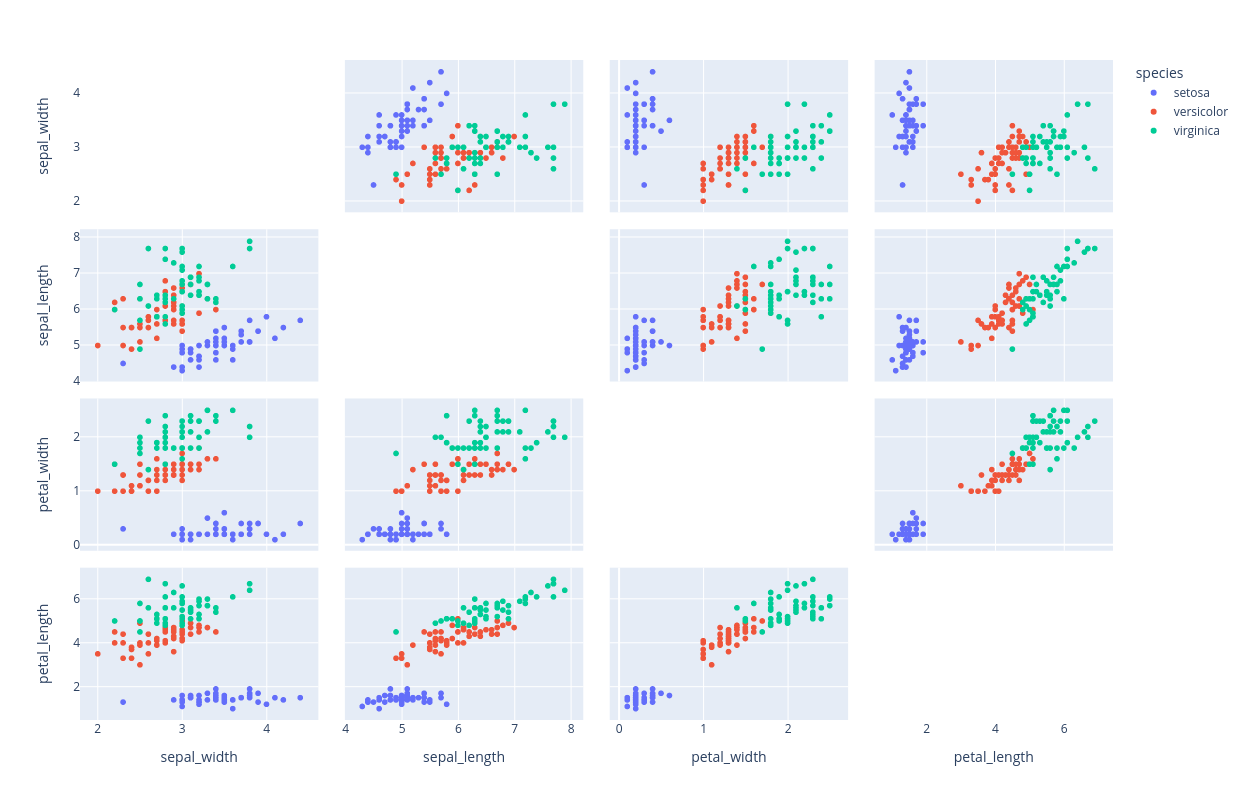

In [ ]:
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]
fig = px.scatter_matrix(
    iris, dimensions=features, color="species", width=1000, height=800
)
fig.update_traces(diagonal_visible=False)

In [ ]:
# preprocessing
iris = iris_preprocessing(iris)

In [ ]:
pca = PCA(n_components=3)
pcs_3d = pca.fit_transform(iris[features])

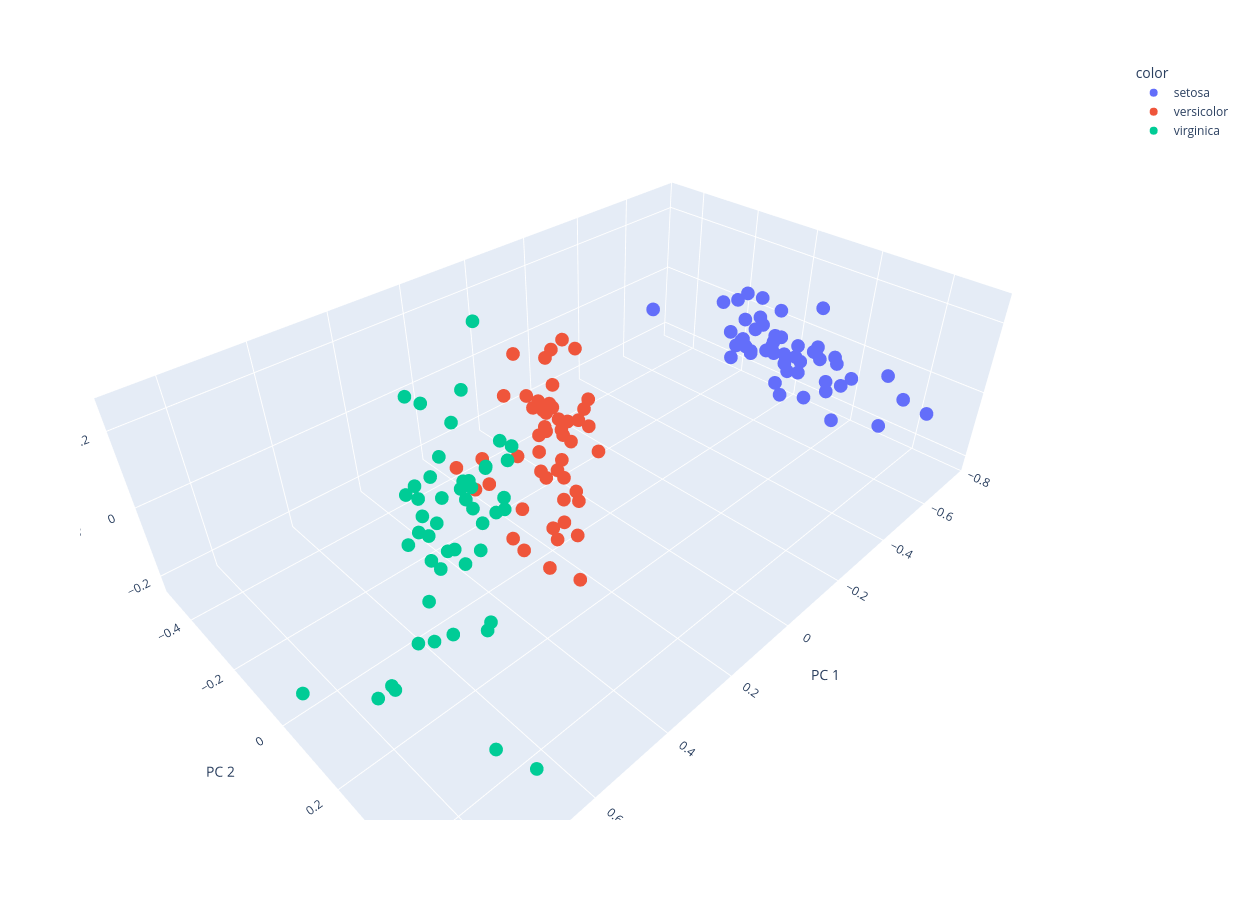

In [ ]:
# code adapted from https://plotly.com/python/pca-visualization/
fig = px.scatter_3d(
    pcs_3d,
    x=0,
    y=1,
    z=2,
    color=iris["species"],
    labels={"0": "PC 1", "1": "PC 2", "2": "PC 3"},
    width=900,
    height=900,
)
fig.show()

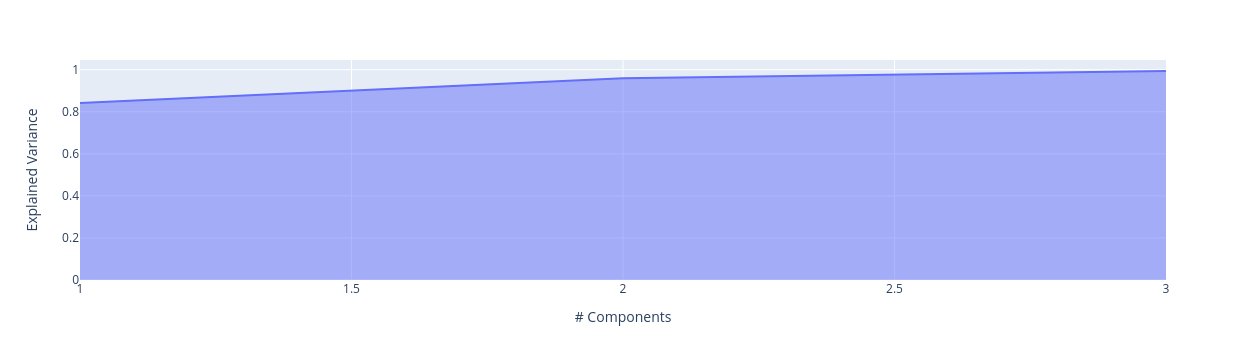

In [ ]:
# look at explained variance contribution of each PC
explained_variance_stats = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, explained_variance_stats.shape[0] + 1),
    y=explained_variance_stats,
    labels={"x": "# Components", "y": "Explained Variance"},
)

Text(0.5, 1.0, 'Elbow Plot')

Text(0.5, 0, 'PC')

Text(0, 0.5, 'Variance Explained (%)')

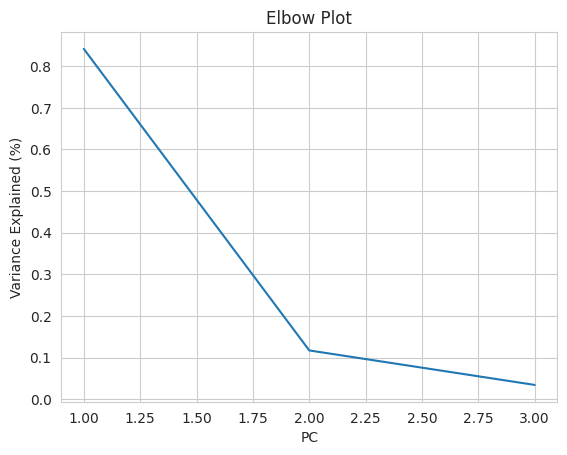

In [ ]:
# plot as elbow curve
number_pcs = np.arange(pca.n_components_) + 1
plt.plot(number_pcs, pca.explained_variance_ratio_)
plt.title("Elbow Plot")
plt.xlabel("PC")
plt.ylabel("Variance Explained (%)")
plt.show()

Using PCA, we reduce the number of dimensions to 2, essentially projecting the points onto a 2d plane/surface. This is easily observable when printing it in 3D.

In [ ]:
pca = PCA(n_components=2)
pcs_2d = pca.fit_transform(iris[features])

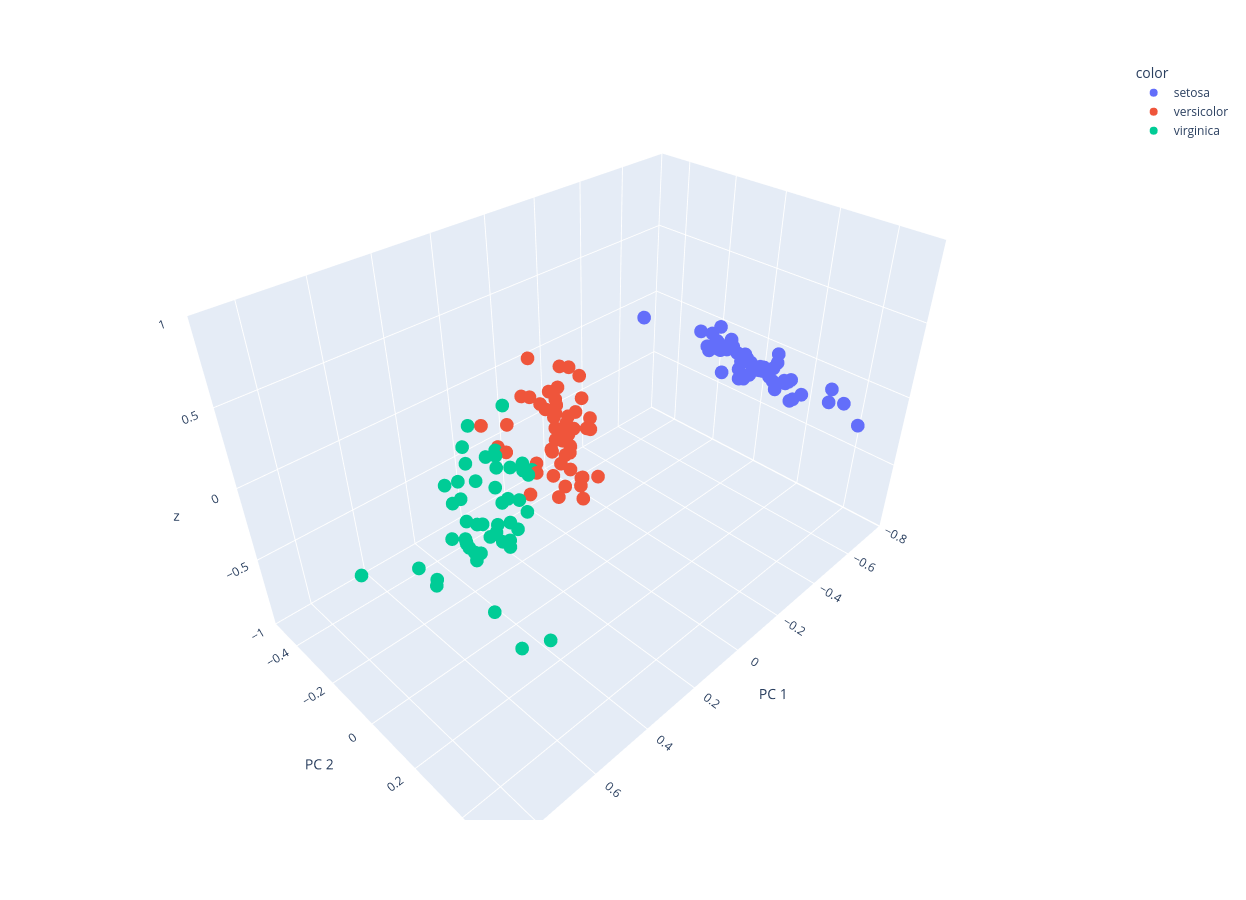

In [ ]:
fig = px.scatter_3d(
    pcs_2d,
    x=0,
    y=1,
    z=np.zeros(len(iris)),
    color=iris["species"],
    labels={"0": "PC 1", "1": "PC 2", "2": "PC 3"},
    width=900,
    height=900,
)
fig.show()

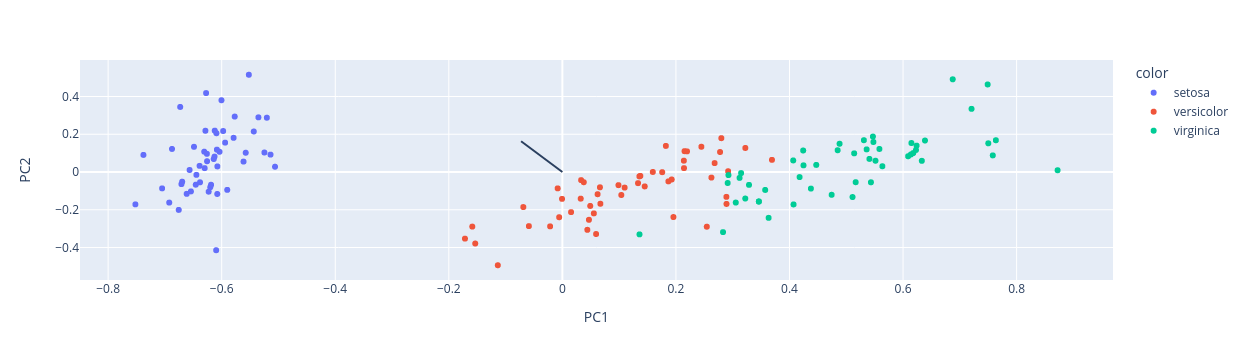

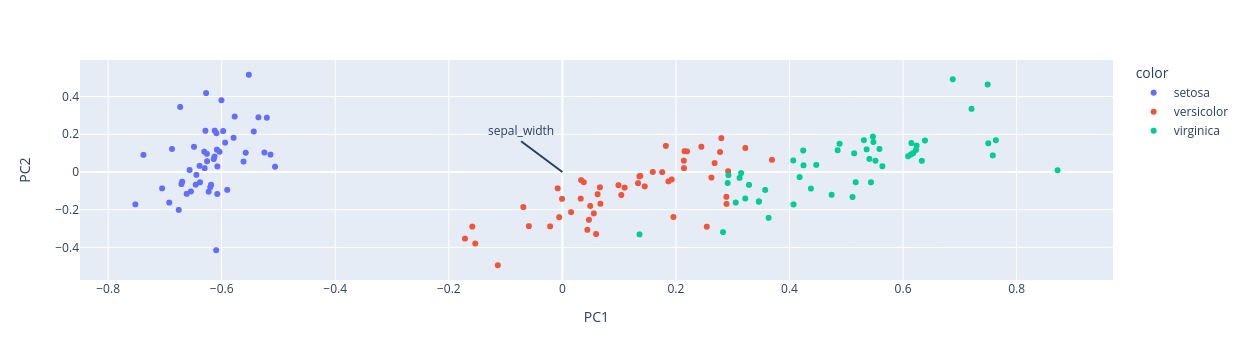

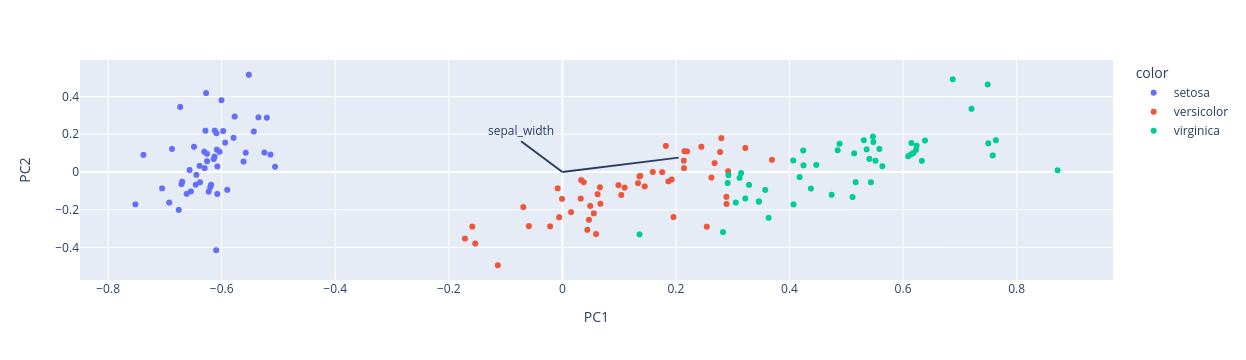

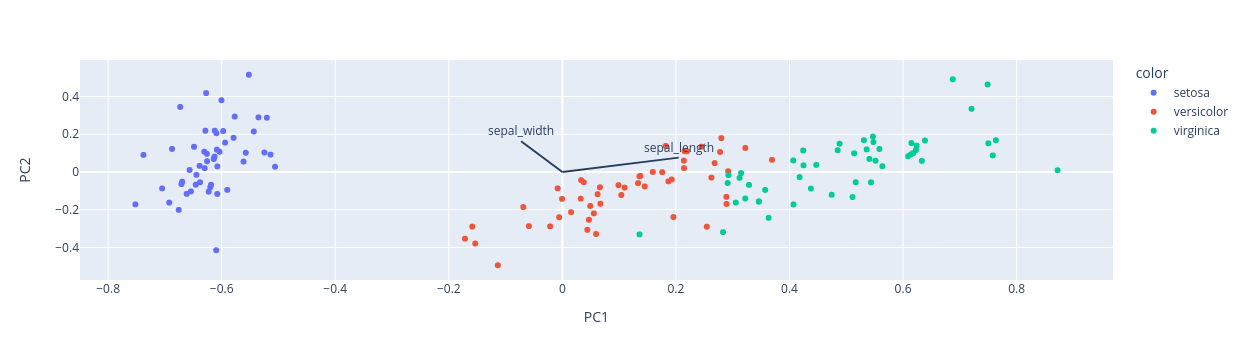

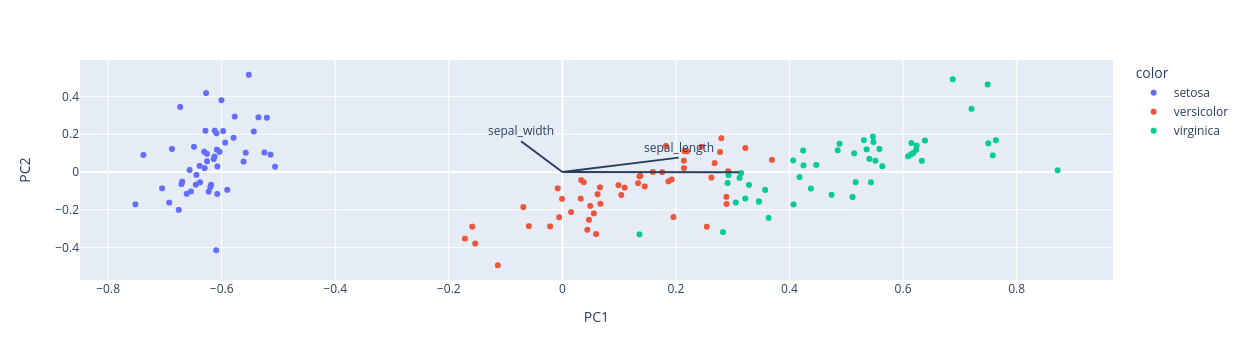

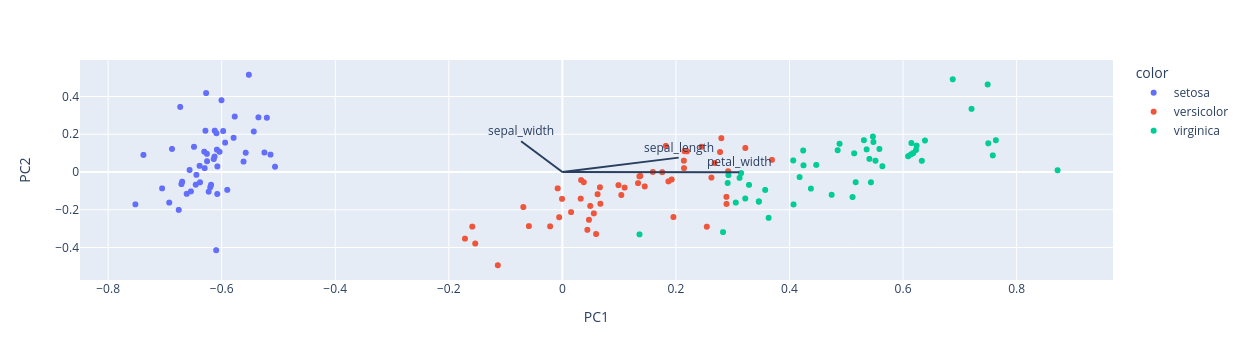

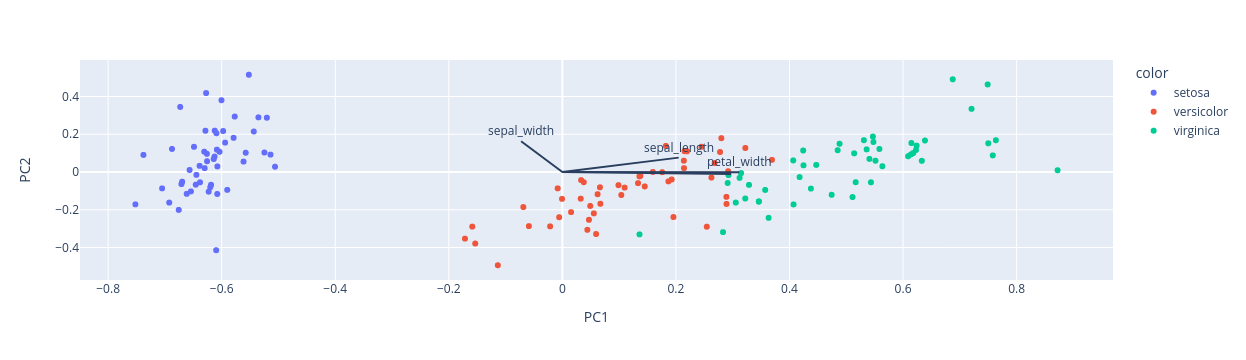

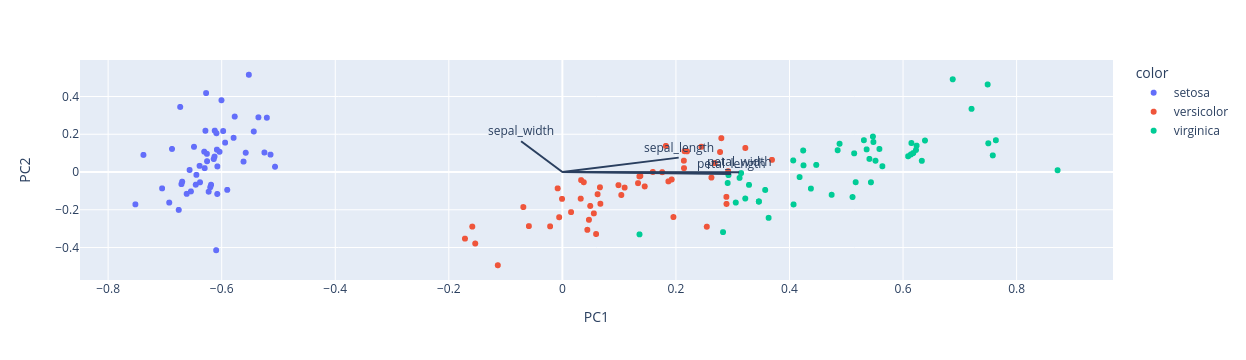

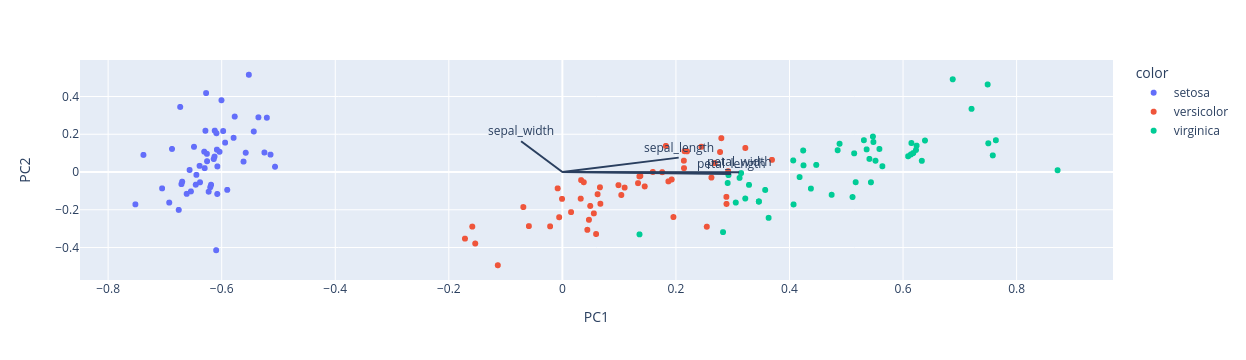

In [ ]:
# plot 2d plot
# include principal components

pca = PCA(n_components=2)
components = pca.fit_transform(iris[features])
# loadings = actual weights for the linear combination for the projection 
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(
    components,
    x=0,
    y=1,
    color=iris["species"],
    labels={"0": "PC1", "1": "PC2"},
)

for i, feature in enumerate(features):
    fig.add_shape(
        type="line", x0=0, y0=0, x1=loadings[i, 0], y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0,
        ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

In [ ]:
pca.components_

array([[-0.15074824,  0.42494212,  0.64568888,  0.61626702],
       [ 0.90396711,  0.42320271, -0.00983925, -0.06038308]])

In [ ]:
pca.explained_variance_ratio_

array([0.84136038, 0.11751808])

#### Computation of PCA

In the following, we will perform PCA step-by-step, again based on the iris dataset.

In [ ]:
# load iris dataset from seaborne, preprocessing
# preprocessing includes centering
iris = sns.load_dataset("iris")
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]
# for reasons of simplicity, reduce pandas df to simple numerical matrix
iris=iris[features].values

In [ ]:
# compute covariance matrix on centered data
mean = np.mean(iris, axis=0)
iris_centered = iris - mean
covariance_matrix = np.cov(iris_centered.T)
covariance_matrix

array([[ 0.18997942, -0.042434  , -0.12163937, -0.32965638],
       [-0.042434  ,  0.68569351,  0.51627069,  1.27431544],
       [-0.12163937,  0.51627069,  0.58100626,  1.2956094 ],
       [-0.32965638,  1.27431544,  1.2956094 ,  3.11627785]])

In [ ]:
# perform eigendecomposition on covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [ ]:
eigenvalues

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [ ]:
eigenvectors

array([[ 0.08452251, -0.73016143,  0.59791083,  0.3197231 ],
       [-0.36138659, -0.65658877, -0.58202985, -0.31548719],
       [-0.3582892 ,  0.07548102,  0.54583143, -0.75365743],
       [-0.85667061,  0.17337266,  0.07623608,  0.47983899]])

In [ ]:
# np.linalg.eig does not necessarily return eigenvalues and vectors sorted
# by Eigenvalue --> sort both vectors analoguously
sorted_index = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_index]
eigenvectors_sorted = eigenvectors[:,sorted_index]
eigenvalues_sorted

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [ ]:
# from the eigenvalues, we can already compute the contribution to 
# explained variance for each PC
sum_eigenvalues = np.sum(eigenvalues_sorted)
for i in range(len(eigenvalues_sorted)):
    print(f"PC{i}: {(eigenvalues_sorted[i] / sum_eigenvalues).round(2)}")

PC0: 0.92
PC1: 0.05
PC2: 0.02
PC3: 0.01


In [ ]:
# we choose to use 2 components
eigenvectors = eigenvectors_sorted[:,0:2]
eigenvectors

array([[ 0.08452251, -0.73016143],
       [-0.36138659, -0.65658877],
       [-0.3582892 ,  0.07548102],
       [-0.85667061,  0.17337266]])

In [ ]:
# apply eigenvectors to original data to reduce dimensions
iris_2d = np.dot(eigenvectors.transpose(),iris_centered.transpose()).transpose()

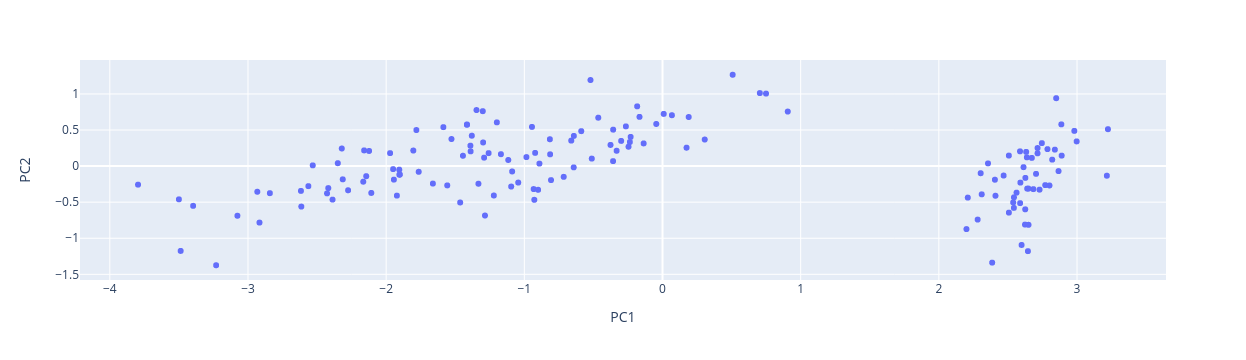

In [ ]:
# visualize results
fig = px.scatter(
    iris_2d,
    x=0,
    y=1,
    #color=iris["species"],
    labels={"0": "PC1", "1": "PC2"},
)
fig.show()

In [ ]:
# principal components are orthogonal
np.matrix.round(np.cov(eigenvectors[0], eigenvectors[1]))

array([[0., 0.],
       [0., 0.]])